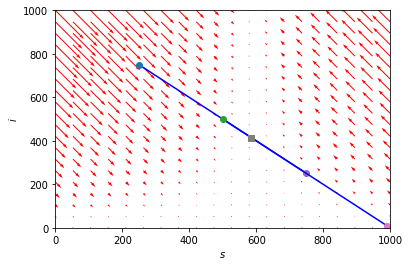

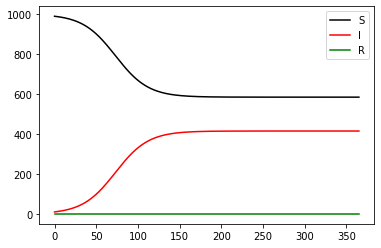

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

R0 = 2.28    # literature
R0 = 0.75 * R0
Gamma = 1/14 # 14 days recovery time
Beta = R0 * Gamma

N = 1000

def sir(X, t):
    s, i = X
    return [(-Beta*i*s/N)+Gamma*i, (Beta*i*s/N)-Gamma*i]

XMax = N
YMax = N

s = np.linspace(0, XMax, 20)
i = np.linspace(0, YMax, 20)

S, I = np.meshgrid(s, i)

t = 0

u, v = np.zeros(S.shape), np.zeros(I.shape)

NI, NJ = S.shape

for i in range(NI):
    for j in range(NJ):
        ss = S[i, j]
        ii = I[i, j]
        yprime = sir([ss, ii], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
        
Q = plt.quiver(S, I, u, v, color='r')

plt.xlabel('$s$')
plt.ylabel('$i$')
plt.xlim([0, XMax])
plt.ylim([0, YMax])

tspan = np.linspace(0, 365, 200)
S = []
I = []
R = []

for p0 in [0.25, 0.5, 0.75, 0.99]:
    s0 = p0 * N
    x0 = [s0, N - s0]
    ys = odeint(sir, x0, tspan)
    if len(S) > 0:
        S = np.vstack((S, ys[:, 0]))
        I = np.vstack((I, ys[:, 1]))
        R = np.vstack((R, N - ys[:, 0] - ys[:, 1]))
    else:
        S = ys[:, 0]
        I = ys[:, 1]
        R = N - ys[:, 0] - ys[:, 1]
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    
plt.show()

pix = 3
plt.plot(tspan, S[pix, :], 'k-', tspan, I[pix, :], 'r-', tspan, R[pix, :], 'g-')
plt.legend(['S', 'I', 'R'])
plt.show()
